In [1]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

driver = webdriver.Chrome("C:/Users/ARPITA/Downloads/chromedriver_win32/chromedriver.exe")
driver.get("https://www.myntra.com/reviews/18652620")
time.sleep(2)
# l =driver.find_element_by_xpath("//button[text()='Most Recent']")
l = driver.find_element(By.CLASS_NAME, "dropdown-filter-dropdownFilterContainer")
#perform click
l.click()


time.sleep(2)
l2 = driver.find_element(By.XPATH, "//*[text()='Most Recent']")
l2.click()





# i=0

time.sleep(5)
previous_height = driver.execute_script('return document.body.scrollHeight')
while True:
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
    time.sleep(5)
    new_height = driver.execute_script('return document.body.scrollHeight')
    if (new_height == previous_height):
        page_source = driver.page_source
        soup = BeautifulSoup(page_source, "html.parser")
#         print(soup)
        break
    previous_height = new_height
print("Done extracting data")

    
    


C:\Users\ARPITA\AppData\Local\Temp\ipykernel_16676\2240266475.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/ARPITA/Downloads/chromedriver_win32/chromedriver.exe")


Done extracting data


In [10]:
RowID = 1
reviews = soup.find_all('div', {'class': 'user-review-userReviewWrapper'})
data = []
for item in reviews:
    review = {
    'RowID': RowID,
    'Name': item.find('div', {'class': 'user-review-left'}).find("span").text,
    'Date': item.find('div', {'class': 'user-review-left'}).find_next('span').find_next('span').text,
    'Review_comment': item.find('div', {'class': 'user-review-reviewTextWrapper'}).text.strip(),
    'Rating': item.find('span', {'class': 'user-review-starRating'}).text,
    'People_Agreed': item.find('div', {'class': 'user-review-votes'}).find_next("div").text,
    'People_Disagreed': item.find('div', {'class': 'user-review-votes'}).find_next("div").find_next("div").text,
    }
    data.append(review)
    RowID+=1
    print(review)


{'RowID': 1, 'Name': 'Sunita', 'Date': '28 Apr 2023', 'Review_comment': 'Quality is good & dupatta also good', 'Rating': '5', 'People_Agreed': '0', 'People_Disagreed': '0'}
{'RowID': 2, 'Name': 'Priti Mangar', 'Date': '26 Apr 2023', 'Review_comment': 'Very nice kurta set I ordered for my mother', 'Rating': '4', 'People_Agreed': '0', 'People_Disagreed': '0'}
{'RowID': 3, 'Name': 'Pallabi Bora', 'Date': '24 Apr 2023', 'Review_comment': "Kurta and trouser's quality is too good but dupatta is very bad 😞 I can't wear this dupatta", 'Rating': '4', 'People_Agreed': '0', 'People_Disagreed': '0'}
{'RowID': 4, 'Name': 'Amatullah', 'Date': '24 Apr 2023', 'Review_comment': 'Liked it', 'Rating': '4', 'People_Agreed': '0', 'People_Disagreed': '0'}
{'RowID': 5, 'Name': 'Vinitha', 'Date': '23 Apr 2023', 'Review_comment': 'Material is of cheap quality', 'Rating': '1', 'People_Agreed': '0', 'People_Disagreed': '0'}
{'RowID': 6, 'Name': 'Myntra Customer', 'Date': '24 Apr 2023', 'Review_comment': 'Cloth f

In [11]:
df = pd.DataFrame(data)
df.to_csv(r'Myntra_product_Review.csv', index=False)
print('CSV file creation complete')

CSV file creation complete


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
from matplotlib.pyplot import imread
from nltk.tokenize import TweetTokenizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [18]:
reviews=pd.read_csv("Myntra_product_Review.csv")
reviews

,RowID,Name,Date,Review_comment,Rating,People_Agreed,People_Disagreed
0,1,Sunita,28 Apr 2023,Quality is good & dupatta also good,5,0,0
1,2,Priti Mangar,26 Apr 2023,Very nice kurta set I ordered for my mother,4,0,0
2,3,Pallabi Bora,24 Apr 2023,Kurta and trouser's quality is too good but du...,4,0,0
3,4,Amatullah,24 Apr 2023,Liked it,4,0,0
4,5,Vinitha,23 Apr 2023,Material is of cheap quality,1,0,0
5,6,Myntra Customer,24 Apr 2023,Cloth fabric was not good... Looks like winter...,1,0,0
6,7,Kamaldeep,23 Apr 2023,Not much happy with the fabric. Okayish product,3,0,0
7,8,Savita Kumari,27 Apr 2023,Product material is not good.,3,0,0
8,9,Nish,27 Apr 2023,Very low quality product not worth it,1,0,0
9,10,Vimal Kumar,26 Apr 2023,Cloth quality is good👍,5,0,0


In [19]:
reviews

,RowID,Name,Date,Review_comment,Rating,People_Agreed,People_Disagreed
0,1,Sunita,28 Apr 2023,Quality is good & dupatta also good,5,0,0
1,2,Priti Mangar,26 Apr 2023,Very nice kurta set I ordered for my mother,4,0,0
2,3,Pallabi Bora,24 Apr 2023,Kurta and trouser's quality is too good but du...,4,0,0
3,4,Amatullah,24 Apr 2023,Liked it,4,0,0
4,5,Vinitha,23 Apr 2023,Material is of cheap quality,1,0,0
5,6,Myntra Customer,24 Apr 2023,Cloth fabric was not good... Looks like winter...,1,0,0
6,7,Kamaldeep,23 Apr 2023,Not much happy with the fabric. Okayish product,3,0,0
7,8,Savita Kumari,27 Apr 2023,Product material is not good.,3,0,0
8,9,Nish,27 Apr 2023,Very low quality product not worth it,1,0,0
9,10,Vimal Kumar,26 Apr 2023,Cloth quality is good👍,5,0,0


In [20]:
reviews.drop(['People_Agreed'],inplace=True,axis=1)

In [22]:
reviews.drop(['People_Disagreed'],inplace=True,axis=1)

# Data Exploration

In [23]:
reviews.Rating.describe()

count    12.000000
mean      3.000000
std       1.477098
min       1.000000
25%       1.750000
50%       3.000000
75%       4.000000
max       5.000000
Name: Rating, dtype: float64

### Number of Words

In [24]:
reviews['word_count'] = reviews['Review_comment'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review_comment','word_count']].head()

,Review_comment,word_count
0,Quality is good & dupatta also good,7
1,Very nice kurta set I ordered for my mother,9
2,Kurta and trouser's quality is too good but du...,18
3,Liked it,2
4,Material is of cheap quality,5


### Number of characters

In [25]:
reviews['char_count'] = reviews['Review_comment'].str.len() ## this also includes spaces
reviews[['Review_comment','char_count']].head()

,Review_comment,char_count
0,Quality is good & dupatta also good,35
1,Very nice kurta set I ordered for my mother,43
2,Kurta and trouser's quality is too good but du...,91
3,Liked it,8
4,Material is of cheap quality,28


### Average Word Length

In [26]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review_comment'].apply(lambda x: avg_word(x))
reviews[['Review_comment','avg_word']].head()

,Review_comment,avg_word
0,Quality is good & dupatta also good,4.142857
1,Very nice kurta set I ordered for my mother,3.888889
2,Kurta and trouser's quality is too good but du...,4.111111
3,Liked it,3.500000
4,Material is of cheap quality,4.800000


### Number of stopwords

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review_comment'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review_comment','stopwords']].head()

,Review_comment,stopwords
0,Quality is good & dupatta also good,1
1,Very nice kurta set I ordered for my mother,2
2,Kurta and trouser's quality is too good but du...,7
3,Liked it,1
4,Material is of cheap quality,2


### Number of special characters

In [28]:
reviews['hashtags'] = reviews['Review_comment'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review_comment','hashtags']].head()

,Review_comment,hashtags
0,Quality is good & dupatta also good,0
1,Very nice kurta set I ordered for my mother,0
2,Kurta and trouser's quality is too good but du...,0
3,Liked it,0
4,Material is of cheap quality,0


### Number of numerics

In [30]:
reviews['numerics'] = reviews['Review_comment'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review_comment','numerics']].head()

,Review_comment,numerics
0,Quality is good & dupatta also good,0
1,Very nice kurta set I ordered for my mother,0
2,Kurta and trouser's quality is too good but du...,0
3,Liked it,0
4,Material is of cheap quality,0


### Number of Uppercase words

In [31]:
reviews['upper'] = reviews['Review_comment'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review_comment','upper']].head()

,Review_comment,upper
0,Quality is good & dupatta also good,0
1,Very nice kurta set I ordered for my mother,1
2,Kurta and trouser's quality is too good but du...,1
3,Liked it,0
4,Material is of cheap quality,0


In [33]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

## Spelling correction

In [34]:
from textblob import TextBlob
reviews['Review_comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                  Quality is good & dupatta also good
1          Very nice bursa set I ordered for my mother
2    Bursa and trouser's quality is too good but du...
3                                             Liked it
4                         Material is of cheap quality
Name: Review_comment, dtype: object

## Feature Engineering

In [35]:
print(reviews['Date'].str.split(' ').str[0],'\n',
      reviews['Date'].str.split(' ').str[1],'\n',
      reviews['Date'].str.split(' ').str[2])

0     28
1     26
2     24
3     24
4     23
5     24
6     23
7     27
8     27
9     26
10    26
11    25
Name: Date, dtype: object 
 0     Apr
1     Apr
2     Apr
3     Apr
4     Apr
5     Apr
6     Apr
7     Apr
8     Apr
9     Apr
10    Apr
11    Apr
Name: Date, dtype: object 
 0     2023
1     2023
2     2023
3     2023
4     2023
5     2023
6     2023
7     2023
8     2023
9     2023
10    2023
11    2023
Name: Date, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [40]:
df=reviews.copy()
df['Date']=df['Date'].str.split(' ').str[0]
df[['Date']]

,Date
0,28
1,26
2,24
3,24
4,23
5,24
6,23
7,27
8,27
9,26


# Data Visualization

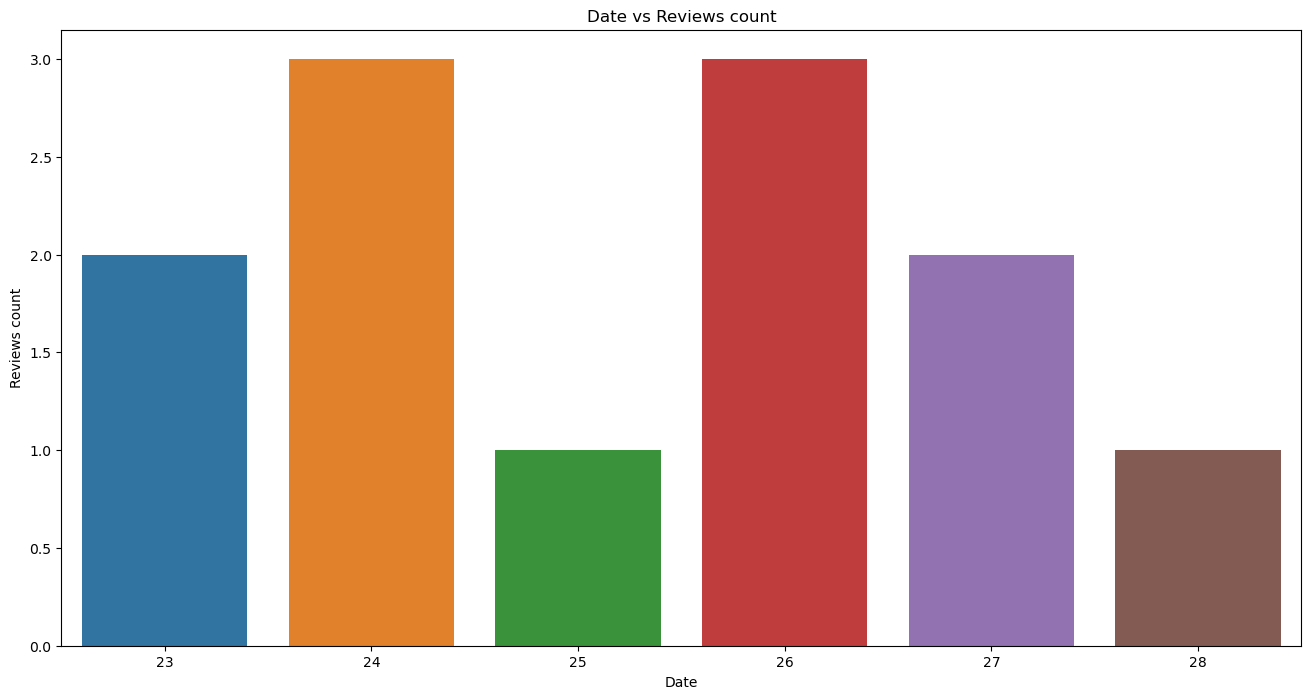

In [42]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review_comment'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review_comment", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

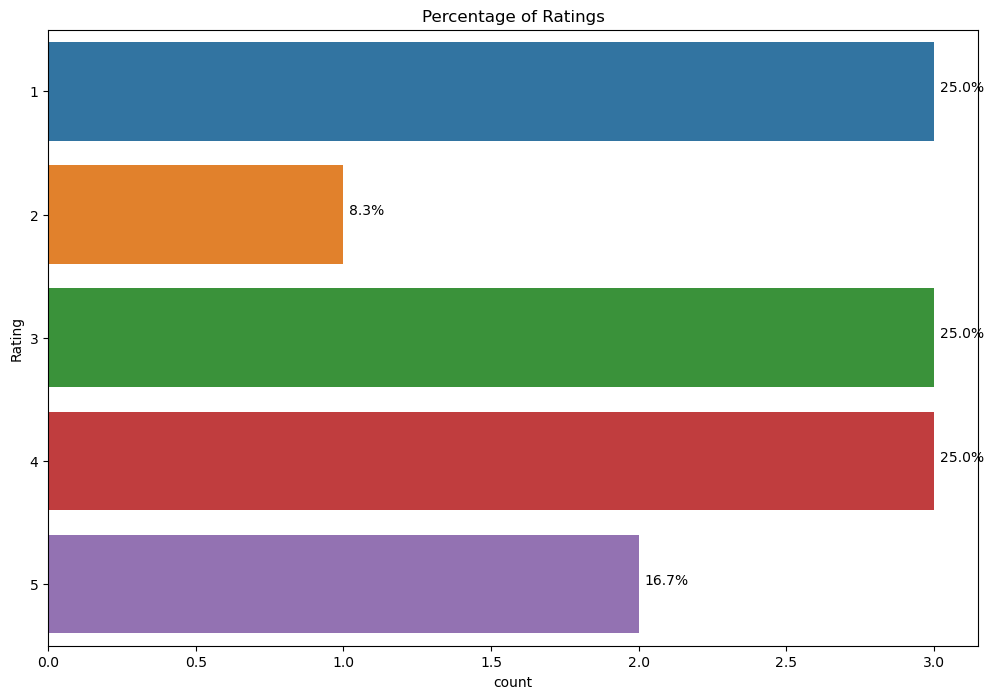

In [43]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# BasicText Preprocessing

## For Sentiment Analysis

In [45]:
data = reviews[['Review_comment']]
data

,Review_comment
0,Quality is good & dupatta also good
1,Very nice kurta set I ordered for my mother
2,Kurta and trouser's quality is too good but du...
3,Liked it
4,Material is of cheap quality
5,Cloth fabric was not good... Looks like winter...
6,Not much happy with the fabric. Okayish product
7,Product material is not good.
8,Very low quality product not worth it
9,Cloth quality is good👍


In [46]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review_comment'] = data['Review_comment'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

C:\Users\ARPITA\AppData\Local\Temp\ipykernel_16676\223147279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review_comment'] = data['Review_comment'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \


In [47]:
data

,Review_comment
0,quality good & dupatta also good
1,very nice kurta set i ordered mother
2,kurta trouser's quality good dupatta bad 😞 i c...
3,liked
4,material cheap quality
5,cloth fabric good... looks like winter stuff
6,not much happy fabric. okayish product
7,product material good.
8,very low quality product worth
9,cloth quality good👍


In [50]:
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm_notebook

lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review_comment"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/12 [00:00<?, ?it/s]

In [51]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review_comment})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,quality good dupatta also good,Quality is good & dupatta also good
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...
3,liked,Liked it
4,material cheap quality,Material is of cheap quality


#  Text Pre-processing Techniques
## Pre-processing 'Key Words'

#### Removing '@names'

In [53]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [54]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,quality good dupatta also good,Quality is good & dupatta also good
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...
3,liked,Liked it
4,material cheap quality,Material is of cheap quality
5,cloth fabric good look like winter stuff,Cloth fabric was not good... Looks like winter...
6,much happy fabric okayish product,Not much happy with the fabric. Okayish product
7,product material good,Product material is not good.
8,low quality product worth,Very low quality product not worth it
9,cloth quality good,Cloth quality is good👍


#### Removing links (http | https)

In [55]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,quality good dupatta also good,Quality is good & dupatta also good
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...
3,liked,Liked it
4,material cheap quality,Material is of cheap quality
5,cloth fabric good look like winter stuff,Cloth fabric was not good... Looks like winter...
6,much happy fabric okayish product,Not much happy with the fabric. Okayish product
7,product material good,Product material is not good.
8,low quality product worth,Very low quality product not worth it
9,cloth quality good,Cloth quality is good👍


#### Removing Review with empty text

In [56]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,quality good dupatta also good,Quality is good & dupatta also good
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...
3,liked,Liked it
4,material cheap quality,Material is of cheap quality
5,cloth fabric good look like winter stuff,Cloth fabric was not good... Looks like winter...
6,much happy fabric okayish product,Not much happy with the fabric. Okayish product
7,product material good,Product material is not good.
8,low quality product worth,Very low quality product not worth it
9,cloth quality good,Cloth quality is good👍


#### Dropping duplicate rows

In [57]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,quality good dupatta also good,Quality is good & dupatta also good
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...
3,liked,Liked it
4,material cheap quality,Material is of cheap quality
5,cloth fabric good look like winter stuff,Cloth fabric was not good... Looks like winter...
6,much happy fabric okayish product,Not much happy with the fabric. Okayish product
7,product material good,Product material is not good.
8,low quality product worth,Very low quality product not worth it
9,cloth quality good,Cloth quality is good👍


#### Removing Punctuations, Numbers and Special characters

In [58]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [59]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,quality good dupatta also good,Quality is good & dupatta also good
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...
3,liked,Liked it
4,material cheap quality,Material is of cheap quality
5,cloth fabric good look like winter stuff,Cloth fabric was not good... Looks like winter...
6,much happy fabric okayish product,Not much happy with the fabric. Okayish product
7,product material good,Product material is not good.
8,low quality product worth,Very low quality product not worth it
9,cloth quality good,Cloth quality is good👍


#### Function to remove emoji

In [60]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [61]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,quality good dupatta also good,Quality is good & dupatta also good
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...
3,liked,Liked it
4,material cheap quality,Material is of cheap quality
5,cloth fabric good look like winter stuff,Cloth fabric was not good... Looks like winter...
6,much happy fabric okayish product,Not much happy with the fabric. Okayish product
7,product material good,Product material is not good.
8,low quality product worth,Very low quality product not worth it
9,cloth quality good,Cloth quality is good👍


In [62]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,quality good dupatta also good,Quality is good & dupatta also good,"[quality, good, dupatta, also, good]"
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother,"[nice, kurta, set, ordered, mother]"
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...,"[kurta, trouser, quality, good, dupatta, bad, ..."
3,liked,Liked it,[liked]
4,material cheap quality,Material is of cheap quality,"[material, cheap, quality]"
5,cloth fabric good look like winter stuff,Cloth fabric was not good... Looks like winter...,"[cloth, fabric, good, look, like, winter, stuff]"
6,much happy fabric okayish product,Not much happy with the fabric. Okayish product,"[much, happy, fabric, okayish, product]"
7,product material good,Product material is not good.,"[product, material, good]"
8,low quality product worth,Very low quality product not worth it,"[low, quality, product, worth]"
9,cloth quality good,Cloth quality is good👍,"[cloth, quality, good]"


In [63]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

#### Removing Stop words

In [65]:
import codecs
with codecs.open("C:/Users/ARPITA/Desktop/DS/NLP-text mining/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [66]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [67]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,quality good dupatta also good,Quality is good & dupatta also good
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...
3,liked,Liked it
4,material cheap quality,Material is of cheap quality
5,cloth fabric good look like winter stuff,Cloth fabric was not good... Looks like winter...
6,much happy fabric okayish product,Not much happy with the fabric. Okayish product
7,product material good,Product material is not good.
8,low quality product worth,Very low quality product not worth it
9,cloth quality good,Cloth quality is good👍


#### Tokenize 'Clean_Reviews'

In [68]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['nice', 'kurta', 'set', 'ordered', 'mother'])

In [69]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0                 [quality, good, dupatta, also, good]
1                  [nice, kurta, set, ordered, mother]
2    [kurta, trouser, quality, good, dupatta, bad, ...
3                                              [liked]
4                           [material, cheap, quality]
5     [cloth, fabric, good, look, like, winter, stuff]
6              [much, happy, fabric, okayish, product]
7                            [product, material, good]
8                       [low, quality, product, worth]
9                               [cloth, quality, good]
Name: Clean_Reviews, dtype: object

#### Converting words to Stemmer

In [70]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [71]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,qualiti good dupatta also good
1,nice kurta set order mother
2,kurta trouser qualiti good dupatta bad wear du...
3,like
4,materi cheap qualiti
5,cloth fabric good look like winter stuff
6,much happi fabric okayish product
7,product materi good
8,low qualiti product worth
9,cloth qualiti good


### Converting words to Lemma

In [72]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ARPITA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,quality good dupatta also good
1,nice kurta set ordered mother
2,kurta trouser quality good dupatta bad wear du...
3,liked
4,material cheap quality
5,cloth fabric good look like winter stuff
6,much happy fabric okayish product
7,product material good
8,low quality product worth
9,cloth quality good


## Basic Feature Extaction

## Applying bag of Words without N grams

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [75]:
print(cv.get_feature_names()[:100])

['also', 'bad', 'cheap', 'cloth', 'color', 'dupatta', 'expected', 'fabric', 'good', 'happy', 'kurta', 'like', 'liked', 'look', 'low', 'material', 'mother', 'much', 'nice', 'okayish', 'ordered', 'product', 'quality', 'set', 'stuff', 'trouser', 'wear', 'winter', 'worth']


## CountVectorizer with N-grams (Bigrams & Trigrams)

In [78]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/12 [00:00<?, ?it/s]

In [79]:
corpus[3]

'like'

In [80]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [81]:
X.shape

(12, 85)

In [82]:
cv.get_feature_names()[:20]

C:\Users\ARPITA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['also',
 'also good',
 'bad',
 'bad wear',
 'bad wear dupatta',
 'cheap',
 'cheap qualiti',
 'cloth',
 'cloth fabric',
 'cloth fabric good',
 'cloth qualiti',
 'cloth qualiti good',
 'color',
 'dupatta',
 'dupatta also',
 'dupatta also good',
 'dupatta bad',
 'dupatta bad wear',
 'expect',
 'fabric']

In [83]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [84]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

C:\Users\ARPITA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,also,also good,bad,bad wear,bad wear dupatta,cheap,cheap qualiti,cloth,cloth fabric,cloth fabric good,...,set order mother,stuff,trouser,trouser qualiti,trouser qualiti good,wear,wear dupatta,winter,winter stuff,worth
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,...,0,0,1,1,1,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


##  TF-IDF Vectorizer

In [85]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/12 [00:00<?, ?it/s]

In [86]:
corpus[4]

'materi cheap qualiti'

In [88]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [89]:
X.shape

(12, 85)

In [90]:
tfidf_v.get_feature_names()[:20]

C:\Users\ARPITA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['also',
 'also good',
 'bad',
 'bad wear',
 'bad wear dupatta',
 'cheap',
 'cheap qualiti',
 'cloth',
 'cloth fabric',
 'cloth fabric good',
 'cloth qualiti',
 'cloth qualiti good',
 'color',
 'dupatta',
 'dupatta also',
 'dupatta also good',
 'dupatta bad',
 'dupatta bad wear',
 'expect',
 'fabric']

In [91]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [92]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

C:\Users\ARPITA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,also,also good,bad,bad wear,bad wear dupatta,cheap,cheap qualiti,cloth,cloth fabric,cloth fabric good,...,set order mother,stuff,trouser,trouser qualiti,trouser qualiti good,wear,wear dupatta,winter,winter stuff,worth
0,0.321173,0.321173,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.291885,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.22645,0.22645,0.22645,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.22645,0.22645,0.22645,0.22645,0.22645,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.00000,0.00000,0.441994,0.441994,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.213575,0.248687,0.248687,...,0.000000,0.248687,0.00000,0.00000,0.00000,0.00000,0.00000,0.248687,0.248687,0.000000
6,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.354512
9,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.425406,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000


## Named Entity Recognition (NER)

In [93]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'quality good dupatta also good nice kurta set ordered mother kurta trouser quality good dupatta bad wear dupatta liked material cheap quality cloth fabric good look like winter stuff much happy fabric okayish product product material good low quality product worth cloth quality good look expected like color'

In [94]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [95]:
for token in doc_block[:50]:
    print(token,token.pos_)  

quality NOUN
good ADJ
dupatta NOUN
also ADV
good ADJ
nice ADJ
kurta PROPN
set VERB
ordered VERB
mother NOUN
kurta PROPN
trouser PROPN
quality NOUN
good ADJ
dupatta NOUN
bad ADJ
wear NOUN
dupatta NOUN
liked VERB
material NOUN
cheap ADJ
quality NOUN
cloth NOUN
fabric NOUN
good ADJ
look NOUN
like ADP
winter NOUN
stuff NOUN
much ADV
happy ADJ
fabric NOUN
okayish ADJ
product NOUN
product NOUN
material NOUN
good ADJ
low ADJ
quality NOUN
product NOUN
worth ADJ
cloth NOUN
quality NOUN
good ADJ
look NOUN
expected VERB
like ADP
color NOUN


In [96]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

[]


In [97]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,quality,5
1,dupatta,3
2,product,3
3,material,2
4,cloth,2
5,fabric,2
6,look,2
7,set,1
8,ordered,1
9,mother,1


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

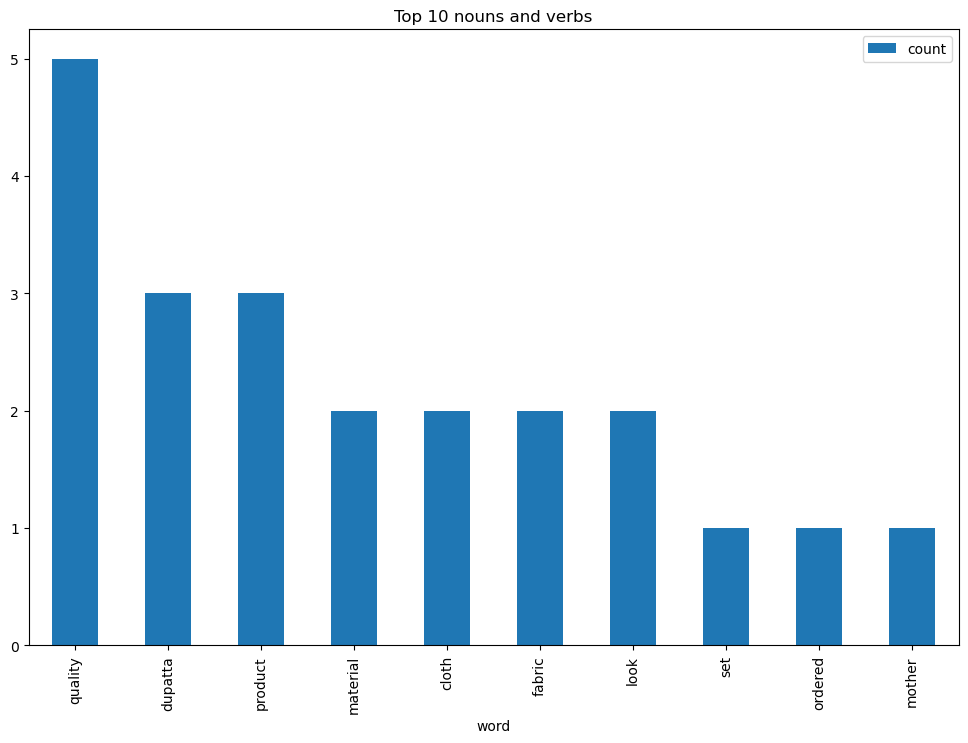

In [98]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

## Feature Extraction for 'Key Words'

In [99]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# Fetch sentiments

In [100]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

# Using NLTK's SentimentIntensityAnalyzer

In [102]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,10
neg,2


In [103]:
dataframe.Clean_Reviews[8]

'low quality product worth'

In [104]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.35, 'neu': 0.333, 'pos': 0.317, 'compound': -0.0516}

In [106]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,quality good dupatta also good,"{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'comp..."
1,nice kurta set ordered mother,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."
2,kurta trouser quality good dupatta bad wear du...,"{'neg': 0.282, 'neu': 0.484, 'pos': 0.234, 'co..."
3,liked,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
4,material cheap quality,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [107]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,quality good dupatta also good,"{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'comp...",0.7003
1,nice kurta set ordered mother,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.4215
2,kurta trouser quality good dupatta bad wear du...,"{'neg': 0.282, 'neu': 0.484, 'pos': 0.234, 'co...",-0.1531
3,liked,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215
4,material cheap quality,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [108]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,quality good dupatta also good,"{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'comp...",0.7003,Positive
1,nice kurta set ordered mother,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.4215,Positive
2,kurta trouser quality good dupatta bad wear du...,"{'neg': 0.282, 'neu': 0.484, 'pos': 0.234, 'co...",-0.1531,Negative
3,liked,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215,Positive
4,material cheap quality,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
5,cloth fabric good look like winter stuff,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.6597,Positive
6,much happy fabric okayish product,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp...",0.5719,Positive
7,product material good,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive
8,low quality product worth,"{'neg': 0.35, 'neu': 0.333, 'pos': 0.317, 'com...",-0.0516,Negative
9,cloth quality good,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive


In [111]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
2,Positive,8
0,Negative,2
1,Neutral,2


<AxesSubplot:xlabel='sentiment', ylabel='count'>

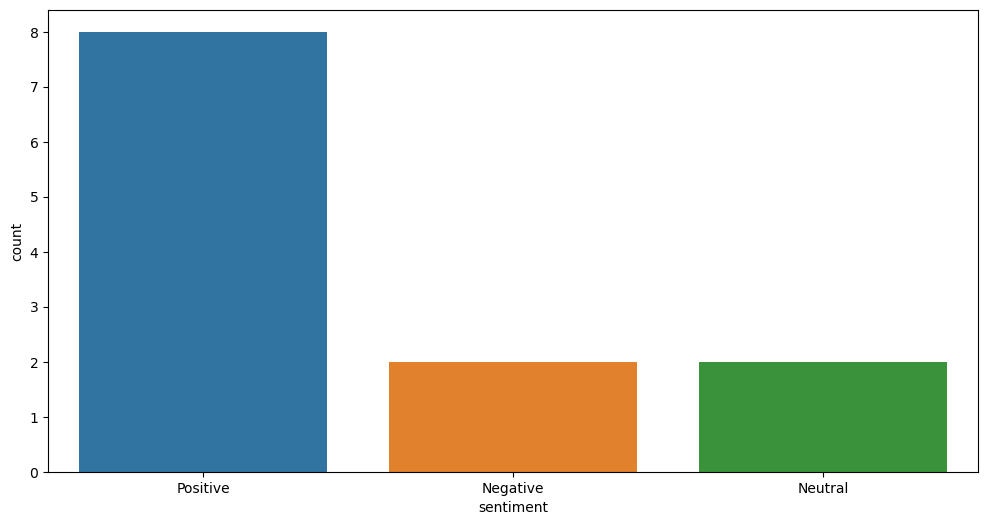

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\ARPITA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compound', ylabel='Density'>

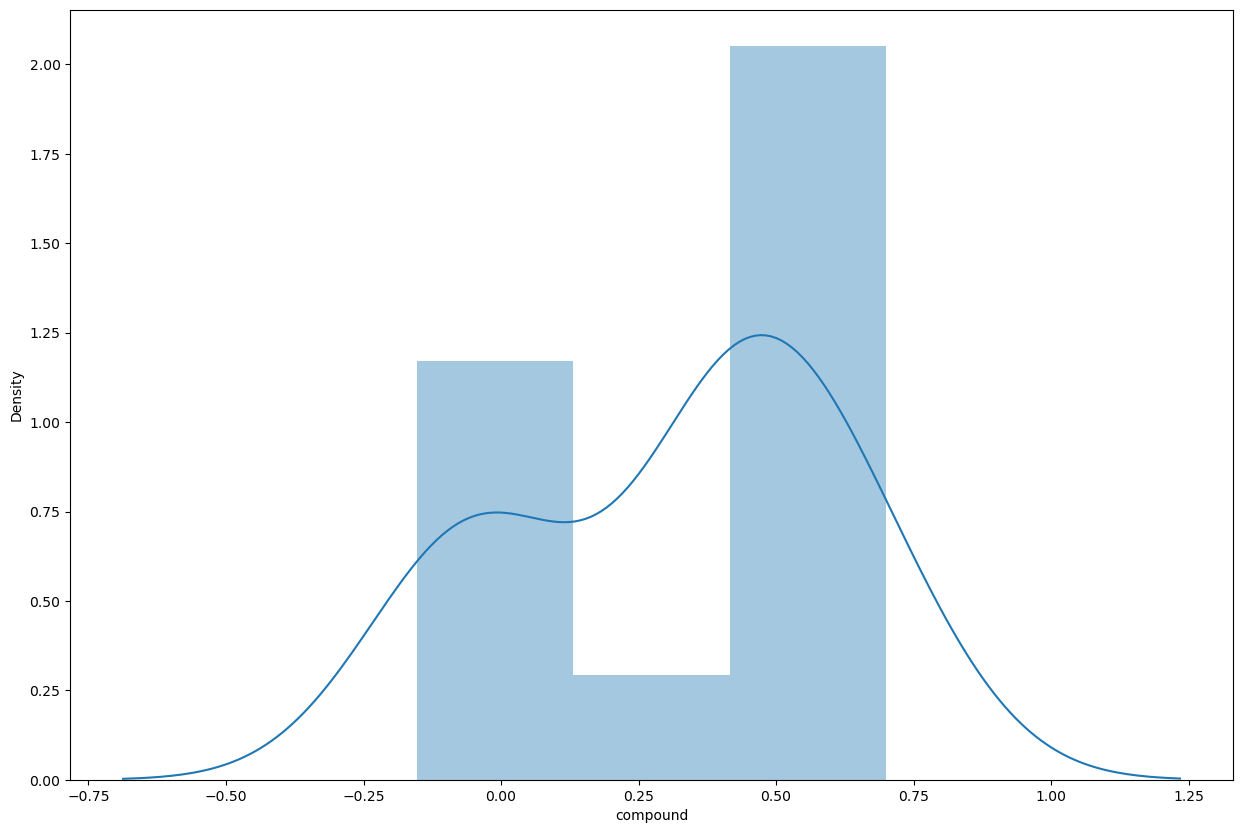

In [113]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [115]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,quality good dupatta also good,5
1,nice kurta set ordered mother,5
2,kurta trouser quality good dupatta bad wear du...,8
3,liked,1
4,material cheap quality,3


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

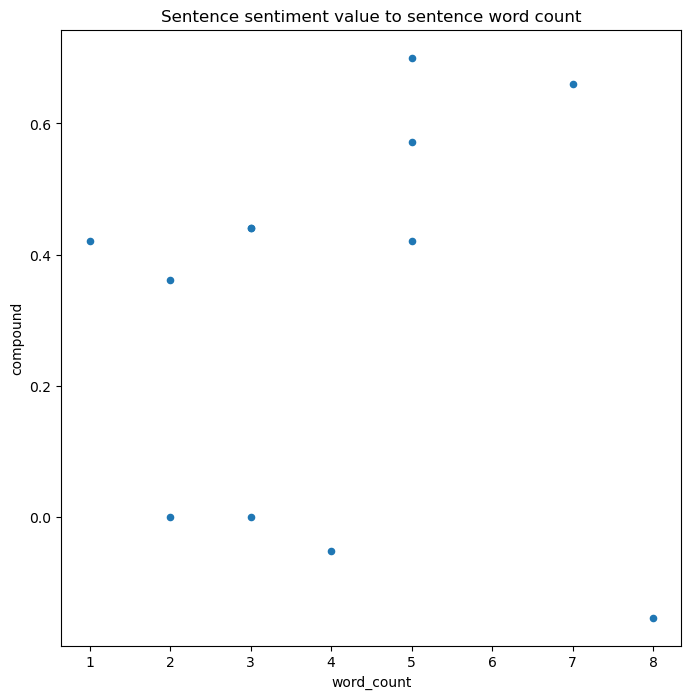

In [116]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [117]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,11
neg,1


In [118]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,quality good dupatta also good,Quality is good & dupatta also good,0.600000,7.000000e-01
1,nice kurta set ordered mother,Very nice kurta set I ordered for my mother,1.000000,6.000000e-01
2,kurta trouser quality good dupatta bad wear du...,Kurta and trouser's quality is too good but du...,0.633333,5.551115e-17
3,liked,Liked it,0.800000,6.000000e-01
4,material cheap quality,Material is of cheap quality,0.700000,4.000000e-01


Text(0, 0.5, 'Subjectivity')

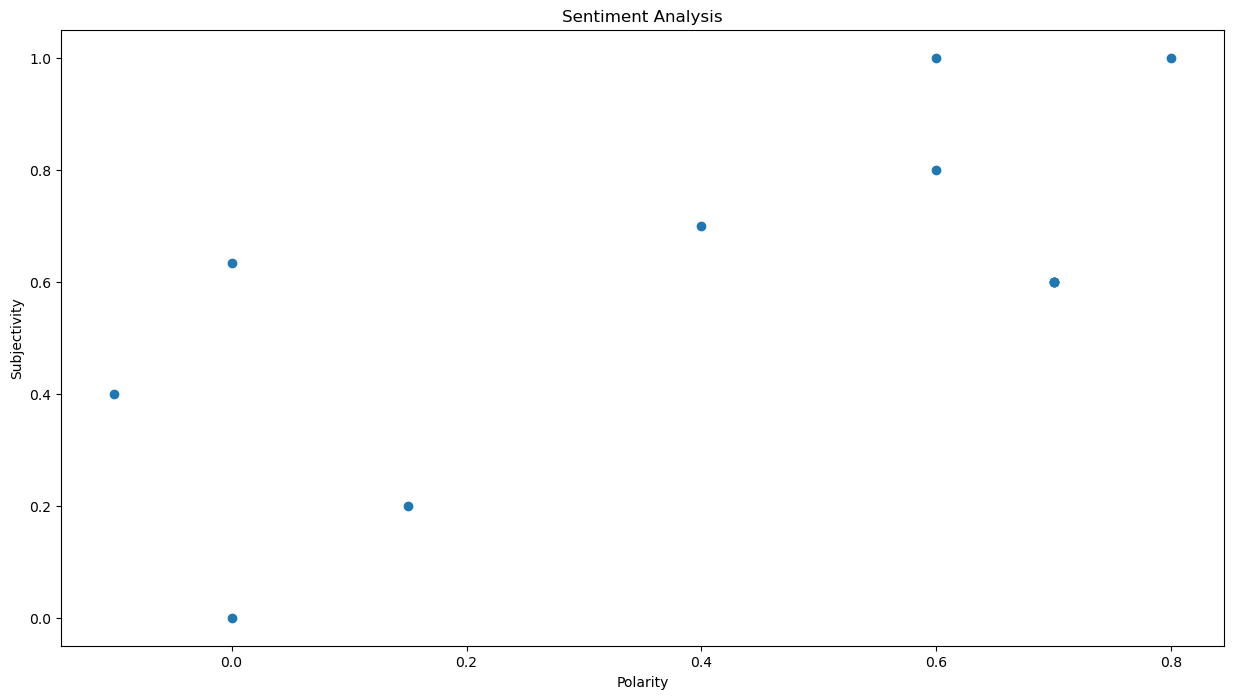

In [119]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

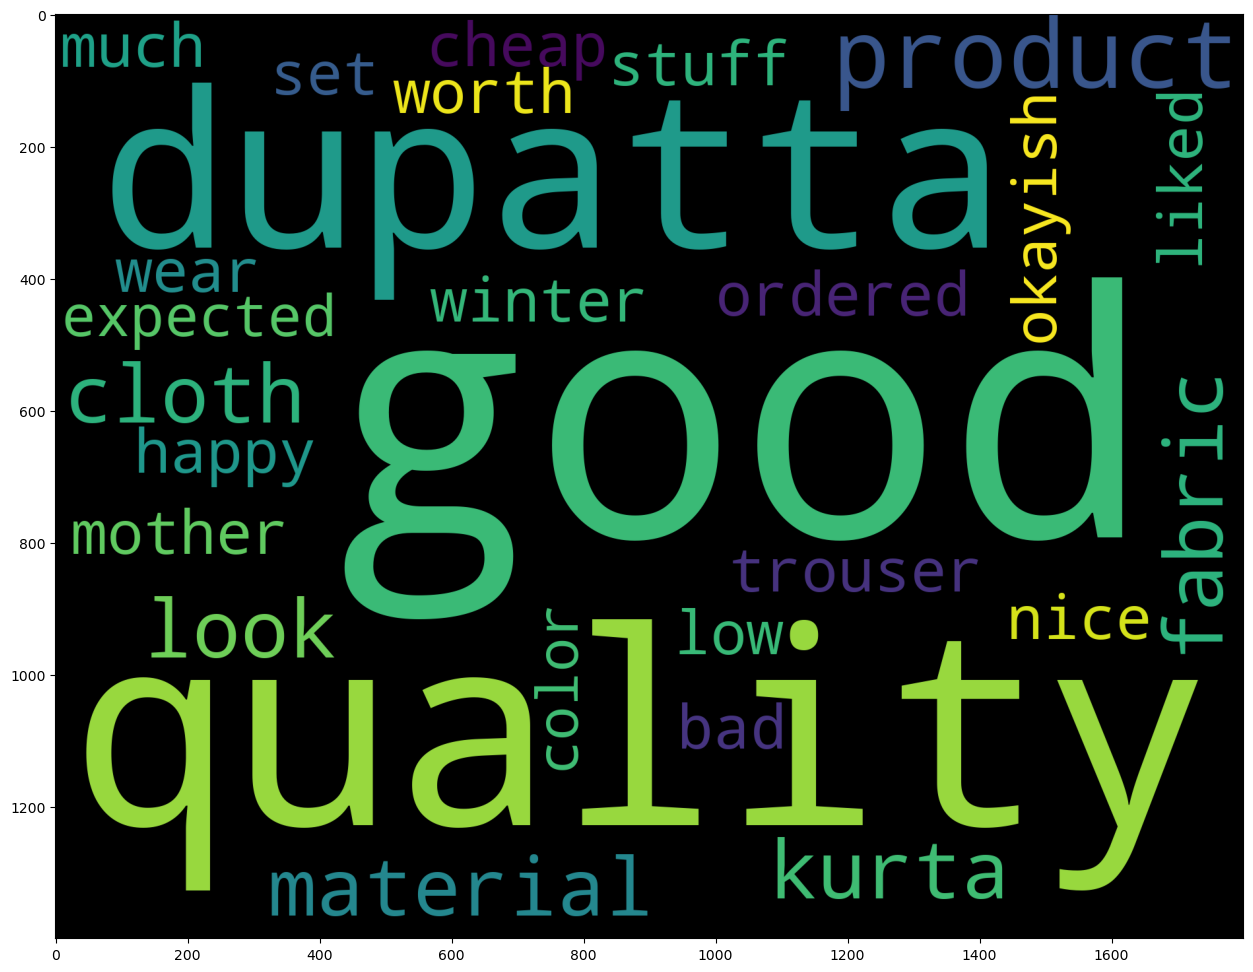

In [120]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)